### Combined all building datas and create new Builiding column

# Import

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# parameters search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization

# models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import catboost as cb
import lightgbm as lgb
# To: install catboost
# !pip3 install catboost

from datetime import datetime
import os
import pathlib
import matplotlib.pyplot as plt

# 1. Load Data

In [102]:
Bldg = pd.read_csv("../Data/microclimate_model/Combined/all_buildings.csv")
Bldg = Bldg.drop(columns = ['Unnamed: 0'])
Bldg

,bldgname,Date_Time,Month,Day,Hour,Minute,Air Temp,Abs Hum,Rel Hum,DSW Top,...,DSW South,DSW West,Shade North,Shade East,Shade South,Shade West,KW,CHWTON,CHWTON/SQFT,HTmmBTU
0,Noble Library,2018-05-16 05:00:00,5,16,5,0,23.516047,4.534450,21.408253,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,151.53,61.60,0.000695,-0.01
1,Noble Library,2018-05-16 05:15:00,5,16,5,15,22.987733,5.423899,26.391075,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,153.91,65.59,0.000740,-0.01
2,Noble Library,2018-05-16 05:30:00,5,16,5,30,22.796033,5.251924,25.836088,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,151.04,63.87,0.000720,-0.01
3,Noble Library,2018-05-16 05:45:00,5,16,5,45,22.718680,5.220844,25.797224,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,152.13,65.71,0.000741,-0.01
4,Noble Library,2018-05-16 06:00:00,5,16,6,0,22.609159,5.195012,25.831215,12.571673,...,0.0,0.0,0.87147,0.981318,1.0,1.0,148.10,61.55,0.000694,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,Biodesign B,2018-09-29 19:45:00,9,29,19,45,34.788404,7.628841,19.487521,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,470.81,629.33,0.004760,0.49
9585,Biodesign B,2018-09-29 20:00:00,9,29,20,0,34.618771,7.730060,19.921645,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,477.77,585.79,0.004431,0.46
9586,Biodesign B,2018-09-29 20:15:00,9,29,20,15,34.448187,7.886578,20.506988,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,474.41,623.64,0.004717,0.48
9587,Biodesign B,2018-09-29 20:30:00,9,29,20,30,34.306344,7.940422,20.800771,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,467.32,621.07,0.004697,0.52


Month available:<br>
May: 16, 23 <br>
June: 7, 8, 20, 21, 25, 26<br>
August: 3, 27<br>
September: 11, 29<br>

# 3. All Buildings

## 3.1 EDA

### 3.1.1 Boxplots

In [103]:
# Create List of building names so we can extract the name easily 
BldgName = list(Bldg.bldgname.unique())

# Create list of building df to do time series plot
BldgList = []

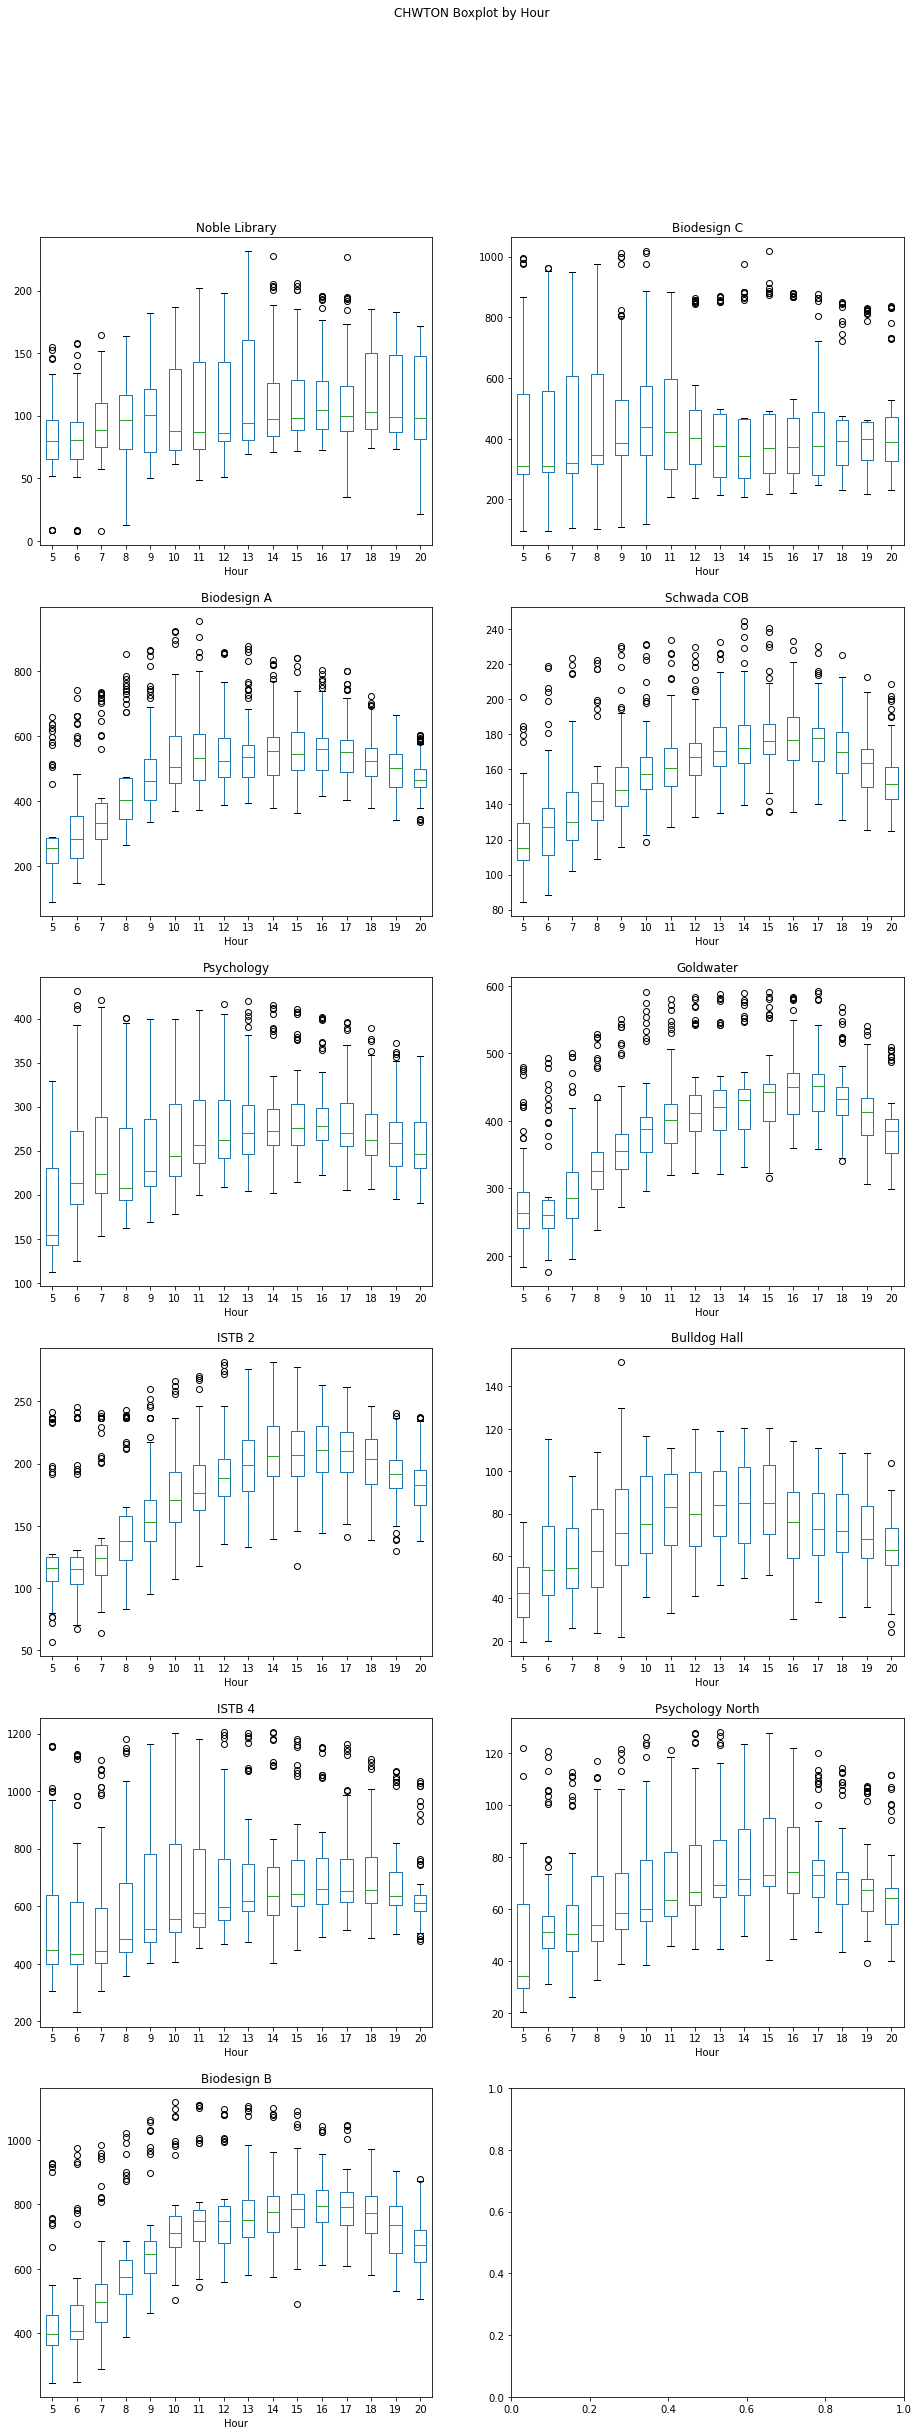

In [104]:
#Create CHWTON boxplots for all buildings #
def createBoxPlot(df, columnName, BldgName):
    row_size = 6
    column_size = 2
    fig, ax = plt.subplots(row_size, column_size, figsize = (15,40))

    i = 0
    # 1. loop through the 11 buildings
    while i < (len(BldgName)):
        # 2. Create row (6)
        for row in range(row_size):
            #4. Create column 2
            for col in range(column_size):
                if i < (len(BldgName)):
                    
                    # create temporary df based on bld name
                    bldg_single = Bldg[Bldg['bldgname'] == BldgName[i]]
                    BldgList.append(bldg_single)
                    # create boxplot of this df
                    bldg_single.boxplot(by='Hour',
                                    column=[columnName],
                                    grid = False,
                                    figsize = (5,5),
                                    ax = ax[row,col] )
                    ax[row,col].title.set_text(BldgName[i])
                    i += 1

    fig.suptitle(columnName + ' Boxplot by Hour')
    plt.show()
    
createBoxPlot(Bldg, 'CHWTON', BldgName)

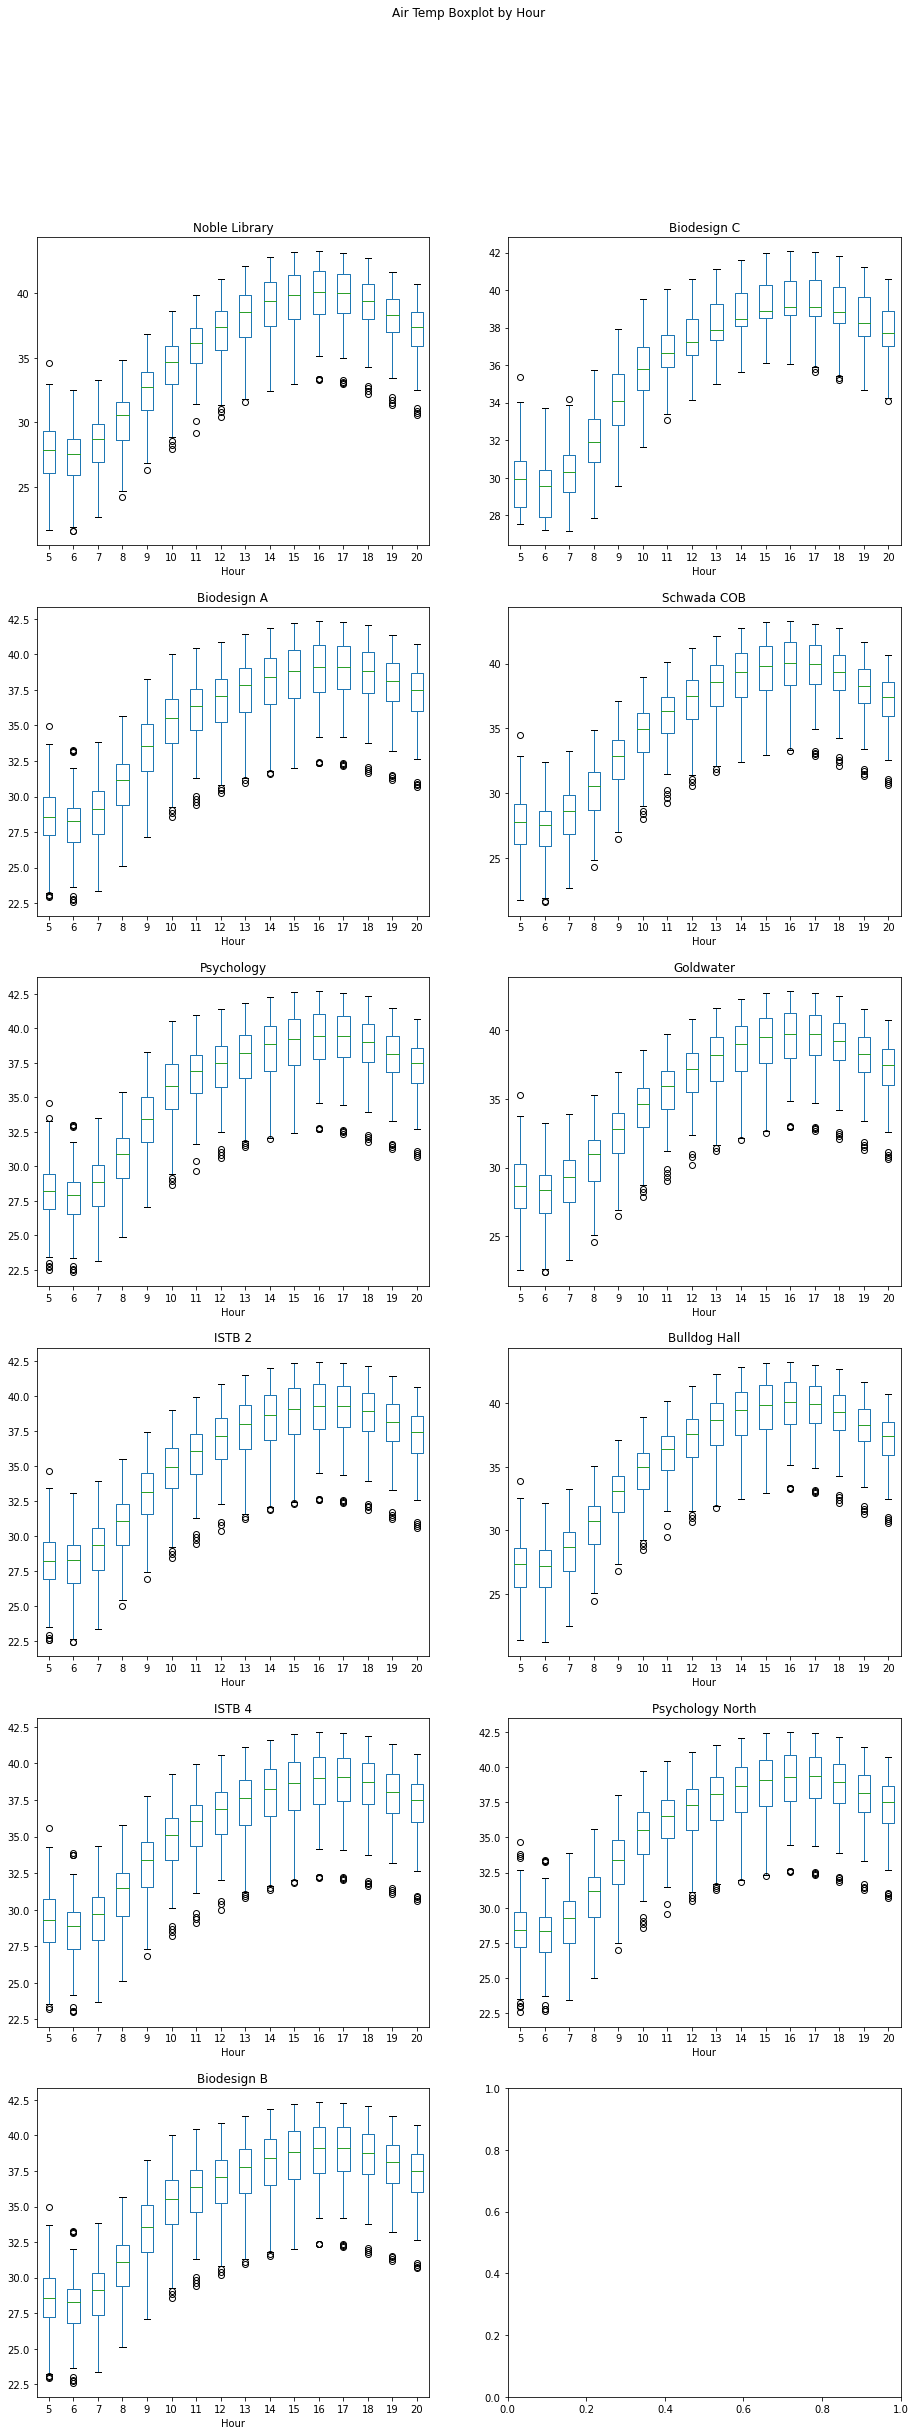

In [105]:
createBoxPlot(Bldg, 'Air Temp', BldgName)

### 3.1.2 Time Series

In [106]:
for bldg in BldgList:
    bldg = bldg.reset_index(inplace = True, drop = True)

BldgList[1]

,bldgname,Date_Time,Month,Day,Hour,Minute,Air Temp,Abs Hum,Rel Hum,DSW Top,...,DSW South,DSW West,Shade North,Shade East,Shade South,Shade West,KW,CHWTON,CHWTON/SQFT,HTmmBTU
0,Biodesign C,2018-06-20 05:00:00,6,20,5,0,28.670944,5.483559,19.418818,0.000000,...,0.0,0.0,1.000000,1.000000,1.0,1.0,505.15,310.23,0.002133,0.33
1,Biodesign C,2018-06-20 05:15:00,6,20,5,15,28.185755,6.011064,21.860167,0.000000,...,0.0,0.0,1.000000,1.000000,1.0,1.0,510.88,306.25,0.002106,0.34
2,Biodesign C,2018-06-20 05:30:00,6,20,5,30,28.079205,6.012209,21.992603,0.000000,...,0.0,0.0,1.000000,1.000000,1.0,1.0,511.36,295.40,0.002031,0.34
3,Biodesign C,2018-06-20 05:45:00,6,20,5,45,27.993262,6.070704,22.311683,0.000000,...,0.0,0.0,1.000000,1.000000,1.0,1.0,506.52,308.41,0.002121,0.34
4,Biodesign C,2018-06-20 06:00:00,6,20,6,0,27.867049,6.248831,23.126297,30.685847,...,0.0,0.0,0.519801,0.604227,1.0,1.0,508.52,301.49,0.002073,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Biodesign C,2018-09-29 19:45:00,9,29,19,45,34.679106,7.578098,19.468595,0.000000,...,0.0,0.0,1.000000,1.000000,1.0,1.0,474.15,440.42,0.003029,0.35
636,Biodesign C,2018-09-29 20:00:00,9,29,20,0,34.525479,7.662037,19.842799,0.000000,...,0.0,0.0,1.000000,1.000000,1.0,1.0,481.05,464.12,0.003192,0.59
637,Biodesign C,2018-09-29 20:15:00,9,29,20,15,34.364552,7.777859,20.312952,0.000000,...,0.0,0.0,1.000000,1.000000,1.0,1.0,478.68,459.39,0.003159,0.34
638,Biodesign C,2018-09-29 20:30:00,9,29,20,30,34.233793,7.829499,20.588252,0.000000,...,0.0,0.0,1.000000,1.000000,1.0,1.0,479.18,488.47,0.003359,0.61


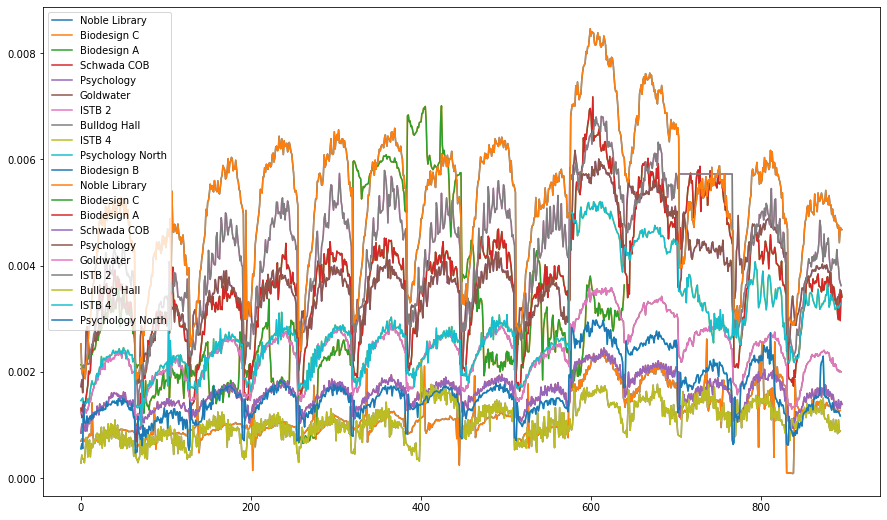

In [107]:
## Print CHWTON/SQFT for all buildings and all timestamps in data
ax = BldgList[0]['CHWTON/SQFT'].plot(figsize = (15,9))
legendlabels = []

for i in range(len(BldgList)-1):
    BldgList[i+1]['CHWTON/SQFT'].plot(ax=ax)
    legendlabels.append(BldgList[i].bldgname[0])
    
ax.legend(labels = legendlabels)


## 3.2 Feature Engineering

### 3.2.1 Combine all building data

In [110]:
Bldg

,bldgname,Date_Time,Month,Day,Hour,Minute,Air Temp,Abs Hum,Rel Hum,DSW Top,...,DSW South,DSW West,Shade North,Shade East,Shade South,Shade West,KW,CHWTON,CHWTON/SQFT,HTmmBTU
0,Noble Library,2018-05-16 05:00:00,5,16,5,0,23.516047,4.534450,21.408253,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,151.53,61.60,0.000695,-0.01
1,Noble Library,2018-05-16 05:15:00,5,16,5,15,22.987733,5.423899,26.391075,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,153.91,65.59,0.000740,-0.01
2,Noble Library,2018-05-16 05:30:00,5,16,5,30,22.796033,5.251924,25.836088,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,151.04,63.87,0.000720,-0.01
3,Noble Library,2018-05-16 05:45:00,5,16,5,45,22.718680,5.220844,25.797224,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,152.13,65.71,0.000741,-0.01
4,Noble Library,2018-05-16 06:00:00,5,16,6,0,22.609159,5.195012,25.831215,12.571673,...,0.0,0.0,0.87147,0.981318,1.0,1.0,148.10,61.55,0.000694,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,Biodesign B,2018-09-29 19:45:00,9,29,19,45,34.788404,7.628841,19.487521,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,470.81,629.33,0.004760,0.49
9585,Biodesign B,2018-09-29 20:00:00,9,29,20,0,34.618771,7.730060,19.921645,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,477.77,585.79,0.004431,0.46
9586,Biodesign B,2018-09-29 20:15:00,9,29,20,15,34.448187,7.886578,20.506988,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,474.41,623.64,0.004717,0.48
9587,Biodesign B,2018-09-29 20:30:00,9,29,20,30,34.306344,7.940422,20.800771,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,467.32,621.07,0.004697,0.52


In [111]:
Bldg.drop(columns = "Date_Time", inplace = True)
Bldg

,bldgname,Month,Day,Hour,Minute,Air Temp,Abs Hum,Rel Hum,DSW Top,DSW North,...,DSW South,DSW West,Shade North,Shade East,Shade South,Shade West,KW,CHWTON,CHWTON/SQFT,HTmmBTU
0,Noble Library,5,16,5,0,23.516047,4.534450,21.408253,0.000000,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,151.53,61.60,0.000695,-0.01
1,Noble Library,5,16,5,15,22.987733,5.423899,26.391075,0.000000,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,153.91,65.59,0.000740,-0.01
2,Noble Library,5,16,5,30,22.796033,5.251924,25.836088,0.000000,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,151.04,63.87,0.000720,-0.01
3,Noble Library,5,16,5,45,22.718680,5.220844,25.797224,0.000000,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,152.13,65.71,0.000741,-0.01
4,Noble Library,5,16,6,0,22.609159,5.195012,25.831215,12.571673,12.662661,...,0.0,0.0,0.87147,0.981318,1.0,1.0,148.10,61.55,0.000694,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,Biodesign B,9,29,19,45,34.788404,7.628841,19.487521,0.000000,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,470.81,629.33,0.004760,0.49
9585,Biodesign B,9,29,20,0,34.618771,7.730060,19.921645,0.000000,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,477.77,585.79,0.004431,0.46
9586,Biodesign B,9,29,20,15,34.448187,7.886578,20.506988,0.000000,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,474.41,623.64,0.004717,0.48
9587,Biodesign B,9,29,20,30,34.306344,7.940422,20.800771,0.000000,0.000000,...,0.0,0.0,1.00000,1.000000,1.0,1.0,467.32,621.07,0.004697,0.52


### 3.2.1 One Hot encoding

In [112]:
# Integer Encode
Bldg = pd.get_dummies(Bldg, drop_first = True)

In [113]:
Bldg

,Month,Day,Hour,Minute,Air Temp,Abs Hum,Rel Hum,DSW Top,DSW North,DSW East,...,bldgname_Biodesign B,bldgname_Biodesign C,bldgname_Bulldog Hall,bldgname_Goldwater,bldgname_ISTB 2,bldgname_ISTB 4,bldgname_Noble Library,bldgname_Psychology,bldgname_Psychology North,bldgname_Schwada COB
0,5,16,5,0,23.516047,4.534450,21.408253,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,5,16,5,15,22.987733,5.423899,26.391075,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,5,16,5,30,22.796033,5.251924,25.836088,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,5,16,5,45,22.718680,5.220844,25.797224,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
4,5,16,6,0,22.609159,5.195012,25.831215,12.571673,12.662661,5.287429,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,9,29,19,45,34.788404,7.628841,19.487521,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
9585,9,29,20,0,34.618771,7.730060,19.921645,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
9586,9,29,20,15,34.448187,7.886578,20.506988,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
9587,9,29,20,30,34.306344,7.940422,20.800771,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0


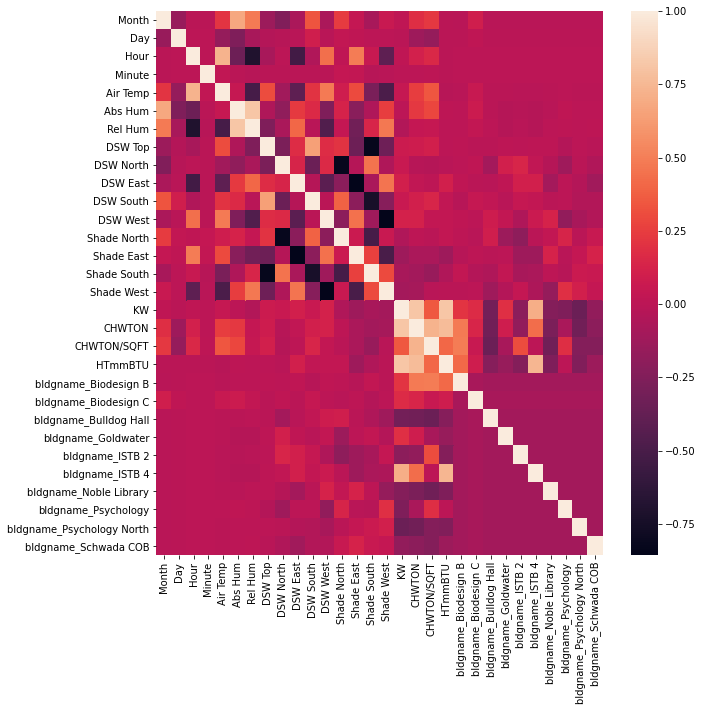

In [114]:

corrMatrix = Bldg.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix)
plt.show()

### 3.2.3 Cyclic Time

In [115]:
# function to encode df columns into sine and cosine
def encode(df, col, max_val):
    df[col.replace('_num', '') + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col.replace('_num', '') + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    df.drop(columns = [col], inplace = True)
    return df


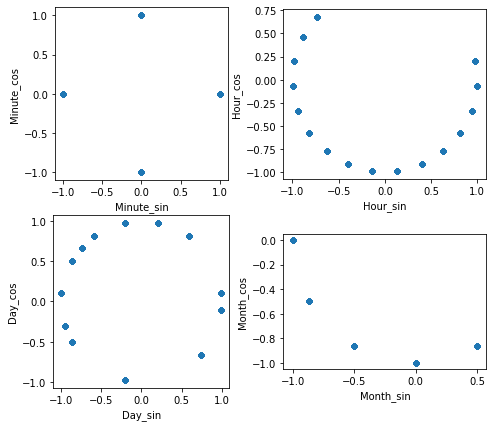

In [117]:
# create a list of df for buildings with cyclical time features
Bldg_cyclic = []

Bldg_enc = Bldg.copy(deep = True)
Bldg_enc = encode(Bldg_enc, 'Minute', 60.0)
Bldg_enc = encode(Bldg_enc, 'Hour', 23.0)
Bldg_enc = encode(Bldg_enc, 'Day', 30.0)
Bldg_enc = encode(Bldg_enc, 'Month', 12.0)
Bldg_cyclic = Bldg_enc
    
# Plot cyclical features sample
fig, ax = plt.subplots(2,2, figsize = (8,7))
Bldg_cyclic.plot.scatter('Minute_sin', 'Minute_cos', ax = ax[0,0]).set_aspect('equal')
Bldg_cyclic.plot.scatter('Hour_sin', 'Hour_cos', ax = ax[0,1]).set_aspect('equal')
Bldg_cyclic.plot.scatter('Day_sin', 'Day_cos', ax = ax[1,0]).set_aspect('equal')
Bldg_cyclic.plot.scatter('Month_sin', 'Month_cos', ax = ax[1,1]).set_aspect('equal')

In [118]:
Bldg_cyclic.reset_index(drop = True, inplace = True)

In [119]:
Bldg_cyclic

,Air Temp,Abs Hum,Rel Hum,DSW Top,DSW North,DSW East,DSW South,DSW West,Shade North,Shade East,...,bldgname_Psychology North,bldgname_Schwada COB,Minute_sin,Minute_cos,Hour_sin,Hour_cos,Day_sin,Day_cos,Month_sin,Month_cos
0,23.516047,4.534450,21.408253,0.000000,0.000000,0.000000,0.0,0.0,1.00000,1.000000,...,0,0,0.000000e+00,1.000000e+00,0.979084,0.203456,-0.207912,-0.978148,0.5,-8.660254e-01
1,22.987733,5.423899,26.391075,0.000000,0.000000,0.000000,0.0,0.0,1.00000,1.000000,...,0,0,1.000000e+00,2.832769e-16,0.979084,0.203456,-0.207912,-0.978148,0.5,-8.660254e-01
2,22.796033,5.251924,25.836088,0.000000,0.000000,0.000000,0.0,0.0,1.00000,1.000000,...,0,0,5.665539e-16,-1.000000e+00,0.979084,0.203456,-0.207912,-0.978148,0.5,-8.660254e-01
3,22.718680,5.220844,25.797224,0.000000,0.000000,0.000000,0.0,0.0,1.00000,1.000000,...,0,0,-1.000000e+00,-1.836970e-16,0.979084,0.203456,-0.207912,-0.978148,0.5,-8.660254e-01
4,22.609159,5.195012,25.831215,12.571673,12.662661,5.287429,0.0,0.0,0.87147,0.981318,...,0,0,0.000000e+00,1.000000e+00,0.997669,-0.068242,-0.207912,-0.978148,0.5,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,34.788404,7.628841,19.487521,0.000000,0.000000,0.000000,0.0,0.0,1.00000,1.000000,...,0,0,-1.000000e+00,-1.836970e-16,-0.887885,0.460065,-0.207912,0.978148,-1.0,-1.836970e-16
9585,34.618771,7.730060,19.921645,0.000000,0.000000,0.000000,0.0,0.0,1.00000,1.000000,...,0,0,0.000000e+00,1.000000e+00,-0.730836,0.682553,-0.207912,0.978148,-1.0,-1.836970e-16
9586,34.448187,7.886578,20.506988,0.000000,0.000000,0.000000,0.0,0.0,1.00000,1.000000,...,0,0,1.000000e+00,2.832769e-16,-0.730836,0.682553,-0.207912,0.978148,-1.0,-1.836970e-16
9587,34.306344,7.940422,20.800771,0.000000,0.000000,0.000000,0.0,0.0,1.00000,1.000000,...,0,0,5.665539e-16,-1.000000e+00,-0.730836,0.682553,-0.207912,0.978148,-1.0,-1.836970e-16


## 3.3 Modelling set up

In [120]:
scores_df = pd.DataFrame()


In [127]:
# function to train a model and get its scores
def trainAndGetScore(pModel, pModelName, pDf_all_bldg, pDf_scores):
    # 1. drop na values if in dataframe
    if (pDf_all_bldg.isnull().values.any() == True):
        pDf_all_bldg = pDf_all_bldg.dropna()
            
    # 2. split data into X and y
    X = pDf_all_bldg.drop(columns=['CHWTON', 'CHWTON/SQFT'])
    y = pDf_all_bldg['CHWTON/SQFT']  
    print('X:\n',X.columns)
    print('y:\n',y)       
    # 3. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)
        
    # 4. fit model that already has parameters
    pModel.fit(X_train, y_train)
        
    # 5. Get prediction
    y_pred = pModel.predict(X_test)
    ModelPred = pd.DataFrame({'Actual CHWTON/SQFT':y_test, 'Predicted CHWTON/SQFT':y_pred})
    ModelPred = ModelPred.sort_index()
    print(ModelPred)
    
    # 6. Get best params if it's a random or grid search
    if("random" in pModelName) or ("grid" in pModelName):
        print(pModel.best_estimator_.get_params())
        
    # Save scores
    score = pModel.score(X_test, y_test)
    pDf_scores.loc[0,pModelName] = score

## 3.4 Model 1: Random Forest


### 3.4.1 No Tuning

In [128]:
RF_base = RandomForestRegressor(n_estimators = 100, random_state = 42)

# 1. Base RF on base data
trainAndGetScore(RF_base, "RF_base", Bldg, scores_df)

# 2. Base RF on cyclical time features
trainAndGetScore(RF_base, "RF_cyclic", Bldg_cyclic, scores_df)


X:
 Index(['Month', 'Day', 'Hour', 'Minute', 'Air Temp', 'Abs Hum', 'Rel Hum',
       'DSW Top', 'DSW North', 'DSW East', 'DSW South', 'DSW West',
       'Shade North', 'Shade East', 'Shade South', 'Shade West', 'KW',
       'HTmmBTU', 'bldgname_Biodesign B', 'bldgname_Biodesign C',
       'bldgname_Bulldog Hall', 'bldgname_Goldwater', 'bldgname_ISTB 2',
       'bldgname_ISTB 4', 'bldgname_Noble Library', 'bldgname_Psychology',
       'bldgname_Psychology North', 'bldgname_Schwada COB'],
      dtype='object')
y:
 0       0.000695
1       0.000740
2       0.000720
3       0.000741
4       0.000694
          ...   
9584    0.004760
9585    0.004431
9586    0.004717
9587    0.004697
9588    0.004675
Name: CHWTON/SQFT, Length: 9589, dtype: float64
      Actual CHWTON/SQFT  Predicted CHWTON/SQFT
0               0.000695               0.000774
3               0.000741               0.000724
6               0.000698               0.000718
9               0.000782               0.000798
12    

In [129]:
scores_df

,RF_base,RF_cyclic
0,0.98675,0.98675


### 3.4.2 Random Search Tuning

In [130]:
# Define parameters for RF

# 1. Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# 2. Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# 3. Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# 4. Minimum number of samples required at each leaf node
min_samples_leaf = [ 1, 2, 4]

# 5. Method of selecting samples for training each tree
bootstrap = [True, False]

# 6. Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [132]:
# 1. Set parameters on random_RF
RF_random = RandomizedSearchCV(estimator = RF_base,
                               param_distributions = random_grid,
                               n_iter = 20, cv = 5,
                               verbose = 2,
                               scoring ='r2',
                               random_state = 42,
                               n_jobs = -1)

# 2. Train on base data
trainAndGetScore(RF_random, "RF_random", Bldg, scores_df)

# 3. Train on data with cyclical time features
trainAndGetScore(RF_random, "RF_random_cyclic", Bldg_cyclic, scores_df)
scores_df

X:
 Index(['Month', 'Day', 'Hour', 'Minute', 'Air Temp', 'Abs Hum', 'Rel Hum',
       'DSW Top', 'DSW North', 'DSW East', 'DSW South', 'DSW West',
       'Shade North', 'Shade East', 'Shade South', 'Shade West', 'KW',
       'HTmmBTU', 'bldgname_Biodesign B', 'bldgname_Biodesign C',
       'bldgname_Bulldog Hall', 'bldgname_Goldwater', 'bldgname_ISTB 2',
       'bldgname_ISTB 4', 'bldgname_Noble Library', 'bldgname_Psychology',
       'bldgname_Psychology North', 'bldgname_Schwada COB'],
      dtype='object')
y:
 0       0.000695
1       0.000740
2       0.000720
3       0.000741
4       0.000694
          ...   
9584    0.004760
9585    0.004431
9586    0.004717
9587    0.004697
9588    0.004675
Name: CHWTON/SQFT, Length: 9589, dtype: float64
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.4min finished


      Actual CHWTON/SQFT  Predicted CHWTON/SQFT
0               0.000695               0.000763
3               0.000741               0.000721
6               0.000698               0.000714
9               0.000782               0.000791
12              0.000809               0.000896
...                  ...                    ...
9572            0.005144               0.005244
9576            0.004960               0.005088
9578            0.004907               0.004971
9580            0.004942               0.004837
9587            0.004697               0.004681

[3836 rows x 2 columns]
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
X:
 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.4min finished


      Actual CHWTON/SQFT  Predicted CHWTON/SQFT
0               0.000695               0.000760
3               0.000741               0.000728
6               0.000698               0.000717
9               0.000782               0.000798
12              0.000809               0.000973
...                  ...                    ...
9572            0.005144               0.005221
9576            0.004960               0.005082
9578            0.004907               0.004958
9580            0.004942               0.004841
9587            0.004697               0.004688

[3836 rows x 2 columns]
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


,RF_base,RF_cyclic,RF_random,RF_random_cyclic
0,0.98675,0.98675,0.988124,0.988638


In [133]:
print(RF_random.best_estimator_.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### 3.4.3 Grid Search Tuning

In [ ]:
param_grid = {'n_estimators': [200, 220, 230,240],
               'max_features': ["sqrt"],
               'max_depth': [17, 20, 22],
               'min_samples_split': [2,3,4],
               'min_samples_leaf': [ 1, 2],
               'bootstrap': bootstrap}

In [ ]:
# 1. Set parameters on random_RF
RF_grid = GridSearchCV(estimator = RF_base,
                       param_grid = param_grid,
                       cv = 5,
                       scoring ='r2',
                       n_jobs = -1)

# 2. Train on base data
trainAndGetScore(RF_grid, "RF_grid", Bldg_df, scores_df)

# 3. Train on data with cyclical time features
trainAndGetScore(RF_grid, "RF_grid_cyclic", Bldg_cyclic, scores_df)
scores_df

## 3.5 Model 2: XGBoost

### 3.5.1. No Tuning

In [ ]:
# 1. create base model
XGB_base = XGBRegressor(n_estimators = 100, random_state = 42)

# 2. Base XGB on base data
trainAndGetScore(XGB_base, "XGB_base", Bldg_df, scores_df)

# 3. Base XGB on cyclica time features
trainAndGetScore(XGB_base, "XGB_cyclic", Bldg_cyclic, scores_df)
scores_df

### 3.5.2. Random Search Tuning

In [ ]:
# 1. Define grid
params = {
    'n_estimators':[ 100, 250, 500, 1000],
    'min_child_weight':[4,5,8], 
    'gamma':[i/10.0 for i in range(3,6)],  
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

# 2. Set up model with grid
n_iter_search = 20
XGB_random = RandomizedSearchCV(XGB_base,
                                param_distributions = params,
                                n_iter = n_iter_search,
                                cv = 5,
                                verbose = 2,
                                random_state = 42,
                                scoring ='r2',
                                n_jobs = -1)

# 2. Train on base data
trainAndGetScore(XGB_random, "XGB_random", Bldg_df, scores_df)

# 3. Train on data with cyclical time features
trainAndGetScore(XGB_random, "XGB_random_cyclic", Bldg_cyclic, scores_df)
scores_df

## 3.6 Model 3: LightGBM

### 3.6.1 No Tuning

In [ ]:
LGBM_base = lgb.LGBMRegressor(random_state = 42)

# 2. Base LGBM on base data
trainAndGetScore(LGBM_base, "LGBM_base", Bldg_df, scores_df)

# 3. Base LGBM on cyclica time features
trainAndGetScore(LGBM_base, "LGBM_cylic", Bldg_cyclic, scores_df)
scores_df

### 3.6.2 Random Search Tuning

In [ ]:
# 1. Define grid
random_grid = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

# 2. Set up model with grid
LGBM_random = RandomizedSearchCV(estimator = LGBM_base,
                                 param_distributions = random_grid, 
                                 n_iter = 100, cv = 2,
                                 scoring='r2',
                                 verbose= 2,
                                 random_state= 42,
                                 n_jobs = -1)


In [ ]:
# 3. Base LGBM on base data
trainAndGetScore(LGBM_random, "LGBM_random", Bldg_df, scores_df)

# 4. Base LGBM on cyclica time features
trainAndGetScore(LGBM_random, "LGBM_random_cyclic", Bldg_cyclic, scores_df)
scores_df

In [ ]:
print("ONE HOT ENCODING SCORE:")
scores_df

## 3.7 Model 4: Catboost

### 3.7.0 Prepare datas using label encoder

In [ ]:
Bldg_df_cat = pd.DataFrame()
for i in range(len(Bldg)):
    Bldg_df_cat = Bldg_df_cat.append(Bldg[i])
    
Bldg_df_cat.reset_index(drop = True , inplace = True)
Bldg_df_cat.drop(columns=['Date', 'Time', 'Date_Time'],inplace = True)
# create a list of df for buildings with cyclical time features
Bldg_cyclic_cat = []

Bldg_enc = Bldg_df_cat.copy(deep = True)
Bldg_enc = encode(Bldg_enc, 'Minute_num', 60.0)
Bldg_enc = encode(Bldg_enc, 'Hour_num', 23.0)
Bldg_enc = encode(Bldg_enc, 'Day_num', 30.0)
Bldg_enc = encode(Bldg_enc, 'Month_num', 12.0)
Bldg_cyclic_cat = Bldg_enc
    
# Plot cyclical features sample
fig, ax = plt.subplots(2,2, figsize = (8,7))
Bldg_cyclic_cat.plot.scatter('Minute_sin', 'Minute_cos', ax = ax[0,0]).set_aspect('equal')
Bldg_cyclic_cat.plot.scatter('Hour_sin', 'Hour_cos', ax = ax[0,1]).set_aspect('equal')
Bldg_cyclic_cat.plot.scatter('Day_sin', 'Day_cos', ax = ax[1,0]).set_aspect('equal')
Bldg_cyclic_cat.plot.scatter('Month_sin', 'Month_cos', ax = ax[1,1]).set_aspect('equal')


In [ ]:
Bldg_cyclic_cat

In [ ]:
label_encoder = LabelEncoder()
# Assigning numerical values and storing in another column
Bldg_df_cat['bldgname'] = label_encoder.fit_transform(Bldg_df_cat['bldgname'])
Bldg_df_cat

In [ ]:
Bldg_df_cat.bldgname.unique()

In [ ]:
# 1. split data into X and y
X = Bldg_df_cat.drop(columns=['CHWTON', 'CHWTON/SQFT'])
y = Bldg_df_cat['CHWTON/SQFT']   

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
        


### 3.7.1 Catboost Random Search

In [ ]:
# 1. hyperparameter grid
cb_grid = {'iterations': [50, 100, 150, 200, 250],
            'learning_rate': [0.03, 0.1],
            'depth': [2, 4, 8, 10, 12],
            'l2_leaf_reg': [0.2, 0.5, 1, 3, 5, 7]}

# 2. instantiate RandomSearchCv object
CB_random_obj = RandomizedSearchCV(estimator = catboost,
                               param_distributions = cb_grid,
                               n_iter = 20, cv = 5,
                               verbose = 2,
                               scoring ='r2',
                               random_state = 42,
                               n_jobs = -1)


# 3. Fit the model
CB_random_obj.fit(X_train,y_train)

# 4. print winning set of hyperparameters
from pprint import pprint
pprint(CB_random_obj.best_estimator_.get_params())
pprint(CB_random_obj.best_score_)

# 5. get the best model
CB_random = CB_random_obj.best_estimator_

# 6. get score 
score = CB_random.score(X_test, y_test)
scores_df['CB_random']=score
print(score)
  

In [ ]:
scores_df

### 3.7.2 Catboost Grid Search

In [ ]:
# 3. initialize model and grid
catboost = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'depth': [8, 10,12],
        'iterations': [230,250,270],
        'learning_rate': [0.08, 0.1, 0.15],
        'l2_leaf_reg': [0.8, 1, 2]}


# 4. search parameter
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
result = catboost.grid_search(grid,
                           train_dataset,
                           cv = 5,
                           search_by_train_test_split=True,
                           shuffle = True,
                           refit = True,
                           verbose = True,
                           train_size = 0.8 )


# 4. get best params
best_params = result['params']

# 5. fit model with best params
CB_grid = cb.CatBoostRegressor(depth = best_params['depth'],
                               iterations = best_params['iterations'],
                               learning_rate= best_params['learning_rate'],
                               l2_leaf_reg = best_params['l2_leaf_reg'])
CB_grid.fit(train_dataset)

# 6. get score 
score = CB_grid.score(X_test, y_test)
scores_df['CB_grid']=score
print(score)


In [ ]:
scores_df